## Import Dependencies

In [193]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from pathlib import Path
from functools import reduce

In [194]:
# Code taken from: https://github.com/egonSchiele/grokking_algorithms/blob/master/03_recursion/python/03_factorial.py
def fact(x):
  if x == 1:
    return 1
  else:
    return x * fact(x-1)

## Create Array and Write FOR Loop to Get Factorials

In [195]:
# Set seed for replicability
np.random.seed(14)
nums = list(np.random.randint(low=100, high=500, size=10))

In [196]:
# Use a FOR loop to get factorials
for_loop_times = []
for_factorials = []
# for i in nums:
#     number = i
#     factorial = 1
#     t1 = time.perf_counter()
#     for k in range(1, number+1):
#         factorial = factorial*k
#         for_factorials.append(factorial)
#     t2 = time.perf_counter()
#     execution = t2-t1
#     for_loop_executiontimes.append(execution)
#     print(f'Factorial of {i} is {factorial}')

for i in nums:
    fac=1
    execution = 0
    for k in range(1,i+1):
        t1 = time.perf_counter()
        fac = fac*k
        t2 = time.perf_counter()
        execution = t2-t1
    for_loop_times.append(execution)
    for_factorials.append(fac)

## Use Recursive Function to Get Factorials

In [197]:
# Use recursion to get factorials -- code taken from 
# Using a python list here instead of output of np.random.randint() to avoid long_scalars overflow RuntimeWarning
# Warning arises because of bit limitations of np.int32 and np.int64 dtypes, which do not arise in python-native integer dtypes
recursion_times = []
recursion_factorials = []

for i in [207, 444, 368, 427, 349, 458, 334, 256, 238, 308]:
    t1 = time.perf_counter()
    factorial = fact(i)
    t2 = time.perf_counter()
    execution = t2-t1
    recursion_factorials.append(factorial)
    recursion_times.append(execution)

# Check that factorials computed recursively are the same as those computed using a for-loop.
if recursion_factorials != for_factorials:
    raise ValueError('Factorial sets made from recursion and for looping are not equal. Take a harder look at how each was computed.')

## Make and Visualize a DataFrame with Timing Results

In [198]:
# Subtract for-loop times from recursion times for differentials
diffs = [recursion_times - for_loop_times for recursion_times, for_loop_times in zip(recursion_times, for_loop_times)]

In [199]:
df = pd.DataFrame(
        {
        'number' : nums
        ,'recursive_compute' : recursion_times
        ,'for_loop_compute'  : for_loop_times
        ,'compute_diff'      : diffs
        })
df

,number,recursive_compute,for_loop_compute,compute_diff
0,207,0.000054,3.280002e-07,0.000054
1,444,0.000131,4.220001e-07,0.000131
2,368,0.000091,4.070007e-07,0.000090
3,427,0.000111,5.759994e-07,0.000111
4,349,0.000084,3.770001e-07,0.000084
5,458,0.000122,3.580008e-07,0.000121
6,334,0.000078,3.679997e-07,0.000078
7,256,0.000054,2.979996e-07,0.000054
8,238,0.000050,2.960005e-07,0.000050
9,308,0.000071,3.139994e-07,0.000070


The assignment called for the dataframe to have the factorial included, but pandas had issues with the large integers.

The original numbers should hold a reasonable approximation to compare compute times, and the assignment does not call for visualization of the factorials on any scale, so I have opted to accept this pandas limitation.

## Visualization

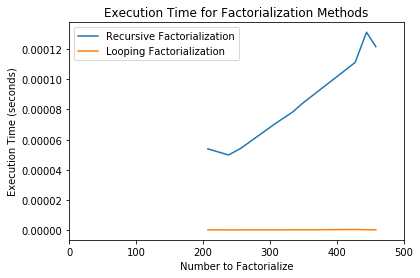

In [200]:
ax = sns.lineplot(x='number', y='recursive_compute', data=df)
ax = sns.lineplot(x='number', y='for_loop_compute', data=df)
ax.legend(['Recursive Factorialization','Looping Factorialization'])

plt.title('Execution Time for Factorialization Methods')
plt.xlabel('Number to Factorialize')
plt.ylabel('Execution Time (seconds)')
plt.xticks([0,100,200,300,400,500])
plt.show()

## Results

We see that using recursion for factorialization of numbers between 100 and 500 is more expensive than using a for-loop, and to a good degree. This is expected behavior; recursive factorializing defined here invokes the function once to find that it has not met the condition, then moves onto the next lowest number, creating a (relatively) lengthy call stack. The function then traces back to perform the actual math. The for-loop for this only invokes the last piece of this process, where it performs the multiplication iteratively (since its beginning and end are already defined by the range() method).

The complexity of the recursive function would be something on the order of $O(n({log n}))$ (recursing $n$ times and $log(n)$ for the added complexity of deciphering whether a given current case is the base or recursive case until the program reaches 1). whereas the complexity of the iterative function is linear at $O(n)$ (performing one operation for each iteration).

The takeaway here is that using iterative factorialization will be more efficient computationally across all cases, but especially as the input grows, specifically at a $log_{2}$ rate.

## Additional Problems - Context Given

##### Modify the factorial function or make a new one in order to circumvent the system recursion limit without changing it.

In [201]:
def chunkIt(num, chnk_size):
    out = [] # initialize an empty list for our output lists
    last = 0 # initialize at 0 (can't factorialize until 1)

    while last < num:
        out.append([range(num)[int(last)],range(num+chnk_size)[int(last+chnk_size)]])
        last += chnk_size
    return out

def nolimit_fact(num, chnk_size=2):
    """
    Function that avoids recursion limits
    """
    chunked_range = chunkIt(num,chnk_size)
    fact_list = []
    
    # Make a loop to go through each element of the output of chunking function
    for i in chunked_range:
        num_list = []
        
        # Make a loop to get a list of every number between the two
        for j in range(i[0],i[1]):
            if j == 0:
                pass
            else:
                num_list.append(j)

        # Multiply all numbers in the chunked range
        fact = reduce(lambda x, y: x*y, num_list)
        fact_list.append(fact)

    # Multiply all numbers of the final list to get the factorial
    final_fact = reduce(lambda x, y: x*y, fact_list)
    return final_fact

The files on a hard drive are saved in a tree-like structure.  Write a function that will print out every file from a given root using a recursive algorithm.  This is called Directory Tree Traversal (https://www.pythoncentral.io/how-to-traverse-a-directory-tree-in-python-guide-to-os-walk/ (Links to an external site.)).  You may not use any packages to do this (like os.walk, or glob), except to list the files and directories in a single directory.  In other words, you are responsible for the traversal.

In [202]:
def printFiles(rootDir):
    """
    Function that prints all files in a given directory and its subdirectories.
    """
    file_list = []
    # Set root directory
    root = rootDir
    
    files = os.listdir(root)
    for i in files:
        filepath = "".join([root,i,"/"])
        
        # Base case - the file path is a file and not a directory
        if not os.path.isdir(filepath):
            file_list.append(filepath[:-1]) #Removing final slash from string made in .join() earlier
            
        # Recursive case - the filepath is itself a directory
        else:
            printFiles(filepath)
    return file_list